# Series de tiempo no estacionarias - Tendencia {-}
## Módulo 5 - TC3007C {-}
### Cristofer Becerra Sánchez - A01638659 {-}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ventas = np.array([4.8, 4.1, 6.0, 6.5, 5.8, 5.2, 6.8, 7.4, 6.0, 5.6, 7.5, 7.8, 6.3, 5.9, 8.0, 8.4])
t = np.arange(1, len(ventas)+1)
t_trim = np.array([y for x in range(4) for y in range(1,5)])

# Visualización de ventas

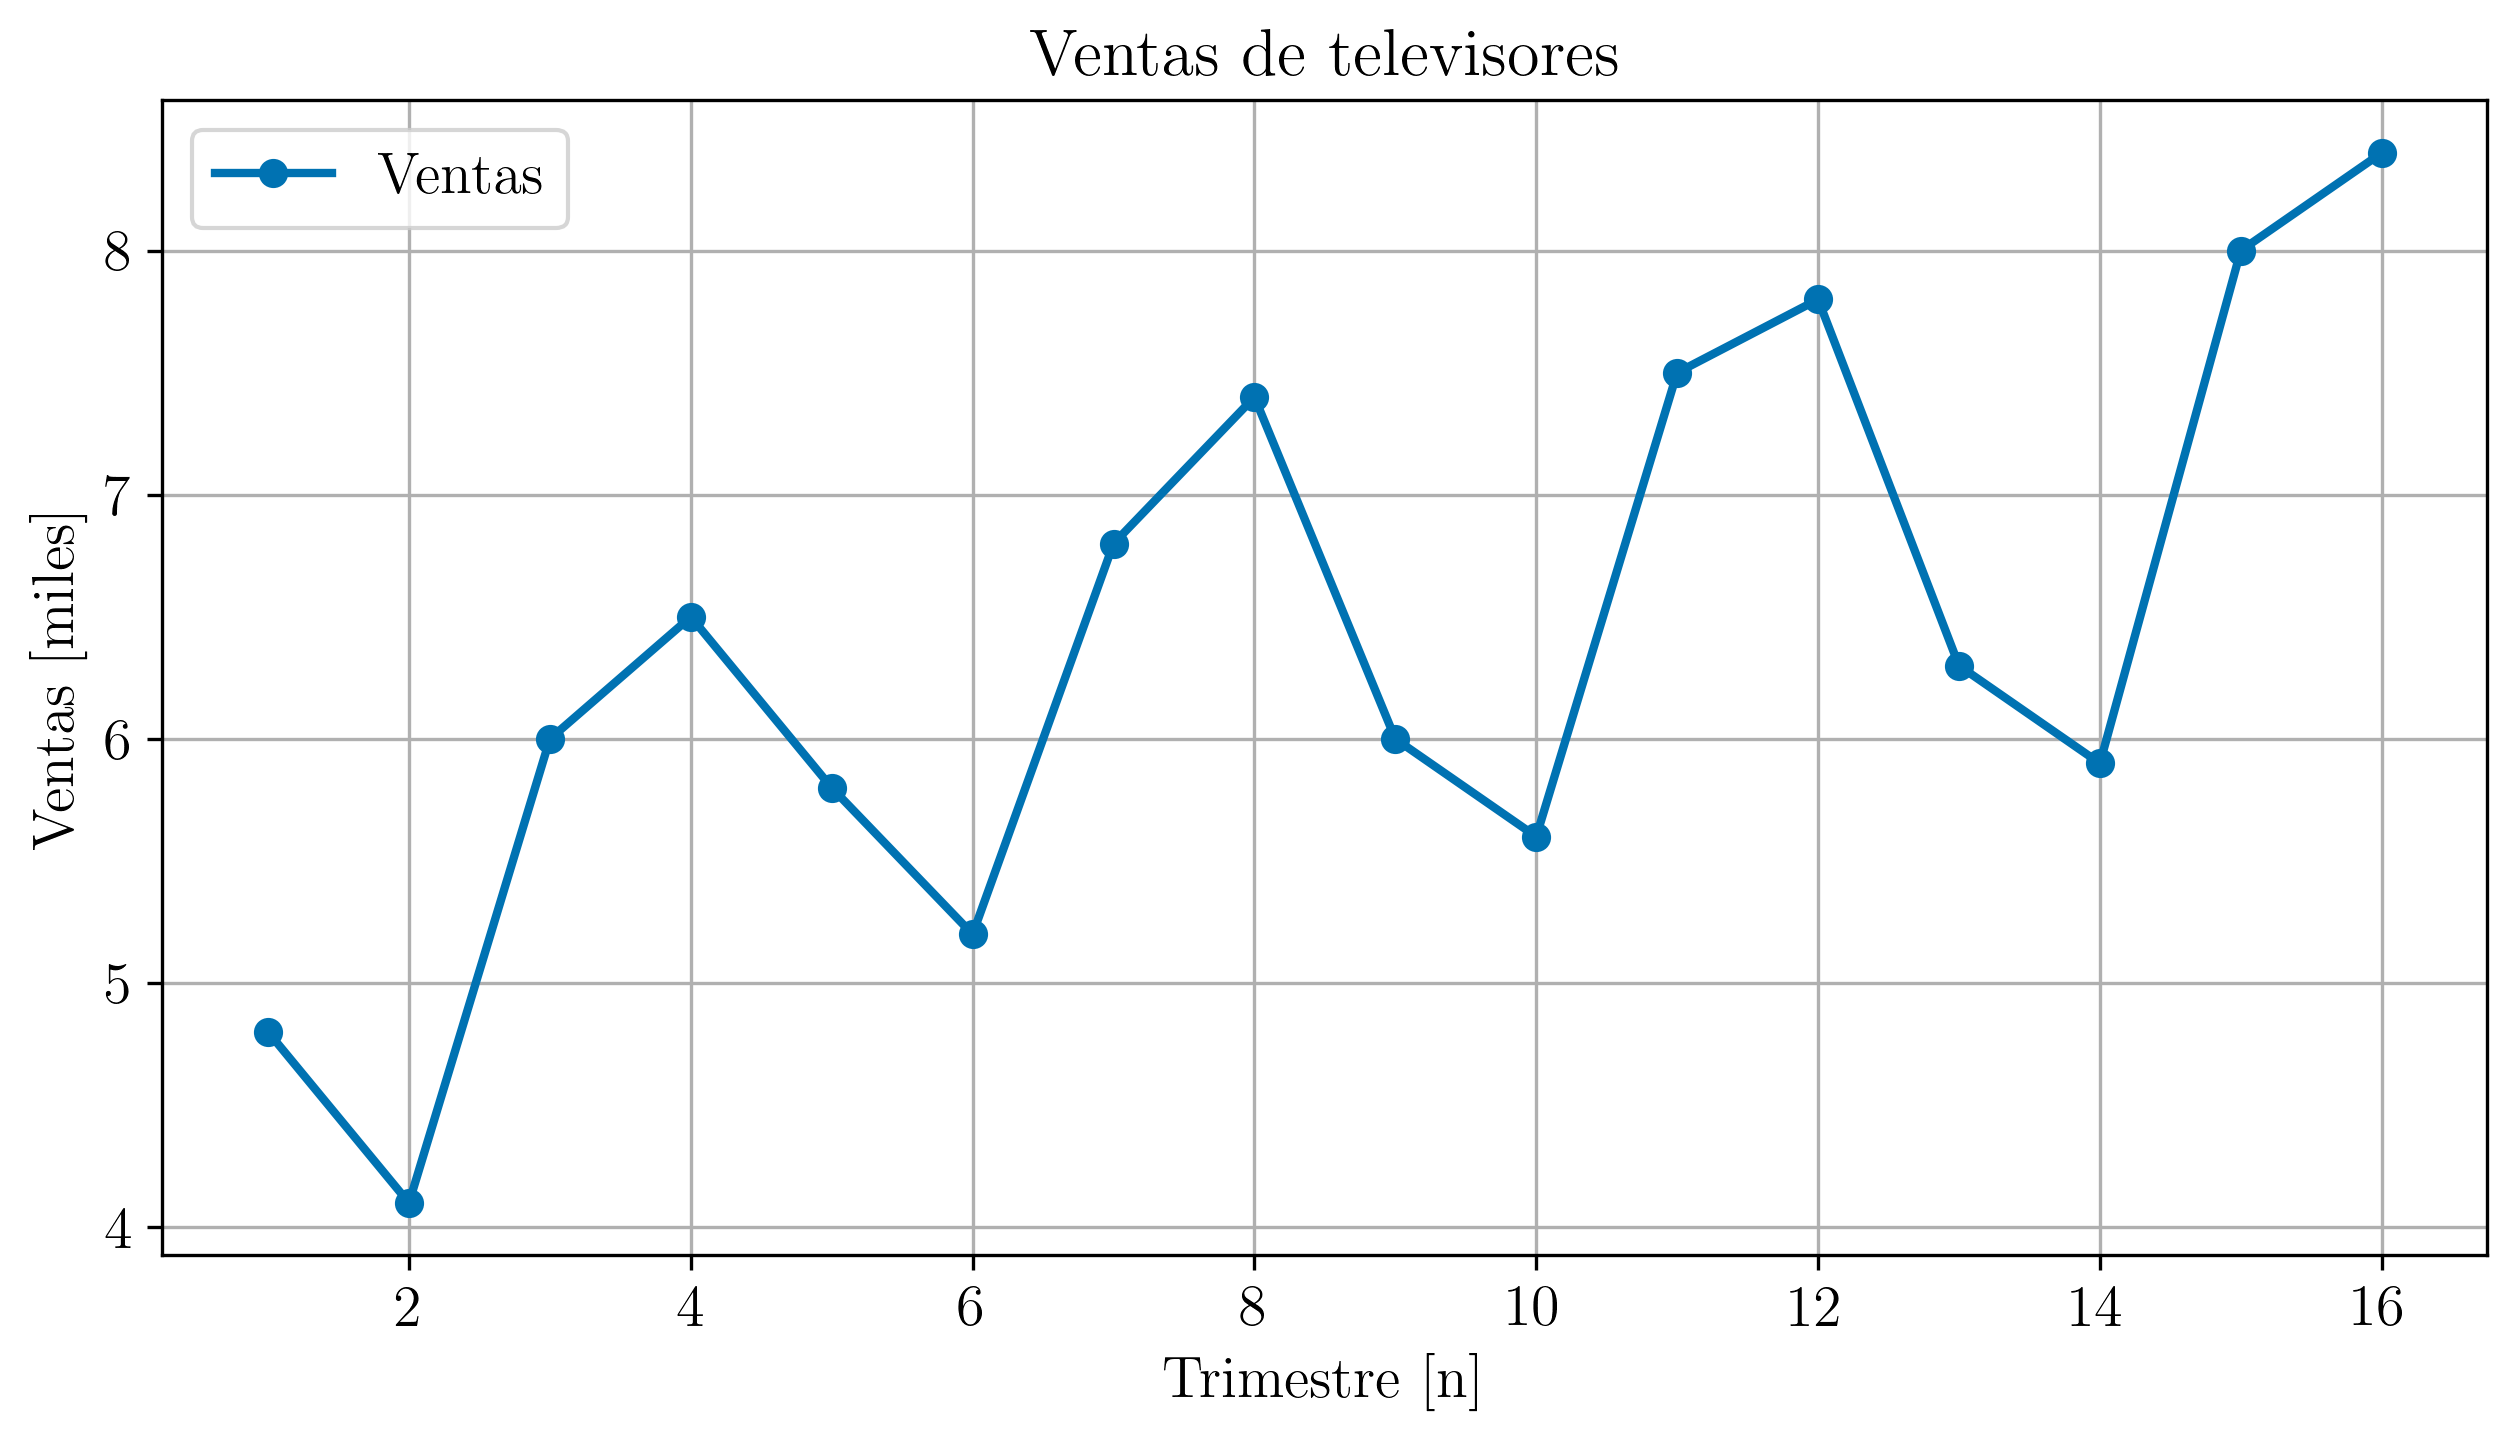

In [3]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams["text.usetex"] = True
plt.rcParams["axes.titlesize"] = 16

fig,axes = plt.subplots(1,1, figsize=(10,5))
title, xlabel, ylabel = "Ventas de televisores", "Trimestre [n]", "Ventas [miles]"
axes.plot(t, ventas, marker="o", color = "#0072B2", linewidth=2, label="Ventas")
axes.set_title(title)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
axes.legend()
plt.grid()
plt.show()

# Análisis de tendencia y estacionalidad

Descomposición de la serie en sus 3 componentes

## Media móvil y media móvil centrada

In [4]:
def media_movil(x, w):
    # x --> arreglo
    # w --> ventana
    rolling = np.zeros(len(x)-w+1)
    for i in range(len(rolling)):   
        rolling[i] = np.mean(x[i:i+w])
    return rolling

In [5]:
# Obtener media movil
mm = media_movil(ventas, 4)
print(mm)
print(len(mm))

[5.35  5.6   5.875 6.075 6.3   6.35  6.45  6.625 6.725 6.8   6.875 7.
 7.15 ]
13


In [6]:
# Obtener media movil centrada
mmC = media_movil(mm, 2)
print(mmC)
print(len(mmC))

[5.475  5.7375 5.975  6.1875 6.325  6.4    6.5375 6.675  6.7625 6.8375
 6.9375 7.075 ]
12


In [7]:
def centrar_array(main, sub):
    n1 = round((len(main) - len(sub)))
    n2 = len(main)
    centered = [None for x in main]
    centered[n1:n2] = sub
    return np.array(centered)

In [8]:
mediaMovil = centrar_array(ventas, mm)
mediaMovilCentrada = centrar_array(ventas, mmC)
print(mediaMovil)
print(len(mediaMovil))
print(mediaMovilCentrada)
print(len(mediaMovilCentrada))

[None None None 5.35 5.6000000000000005 5.875 6.075 6.300000000000001 6.35
 6.449999999999999 6.625 6.7250000000000005 6.8 6.875 7.0 7.15]
16
[None None None None 5.475 5.737500000000001 5.975 6.1875 6.325
 6.3999999999999995 6.5375 6.675000000000001 6.7625 6.8375 6.9375 7.075]
16


### Visualización

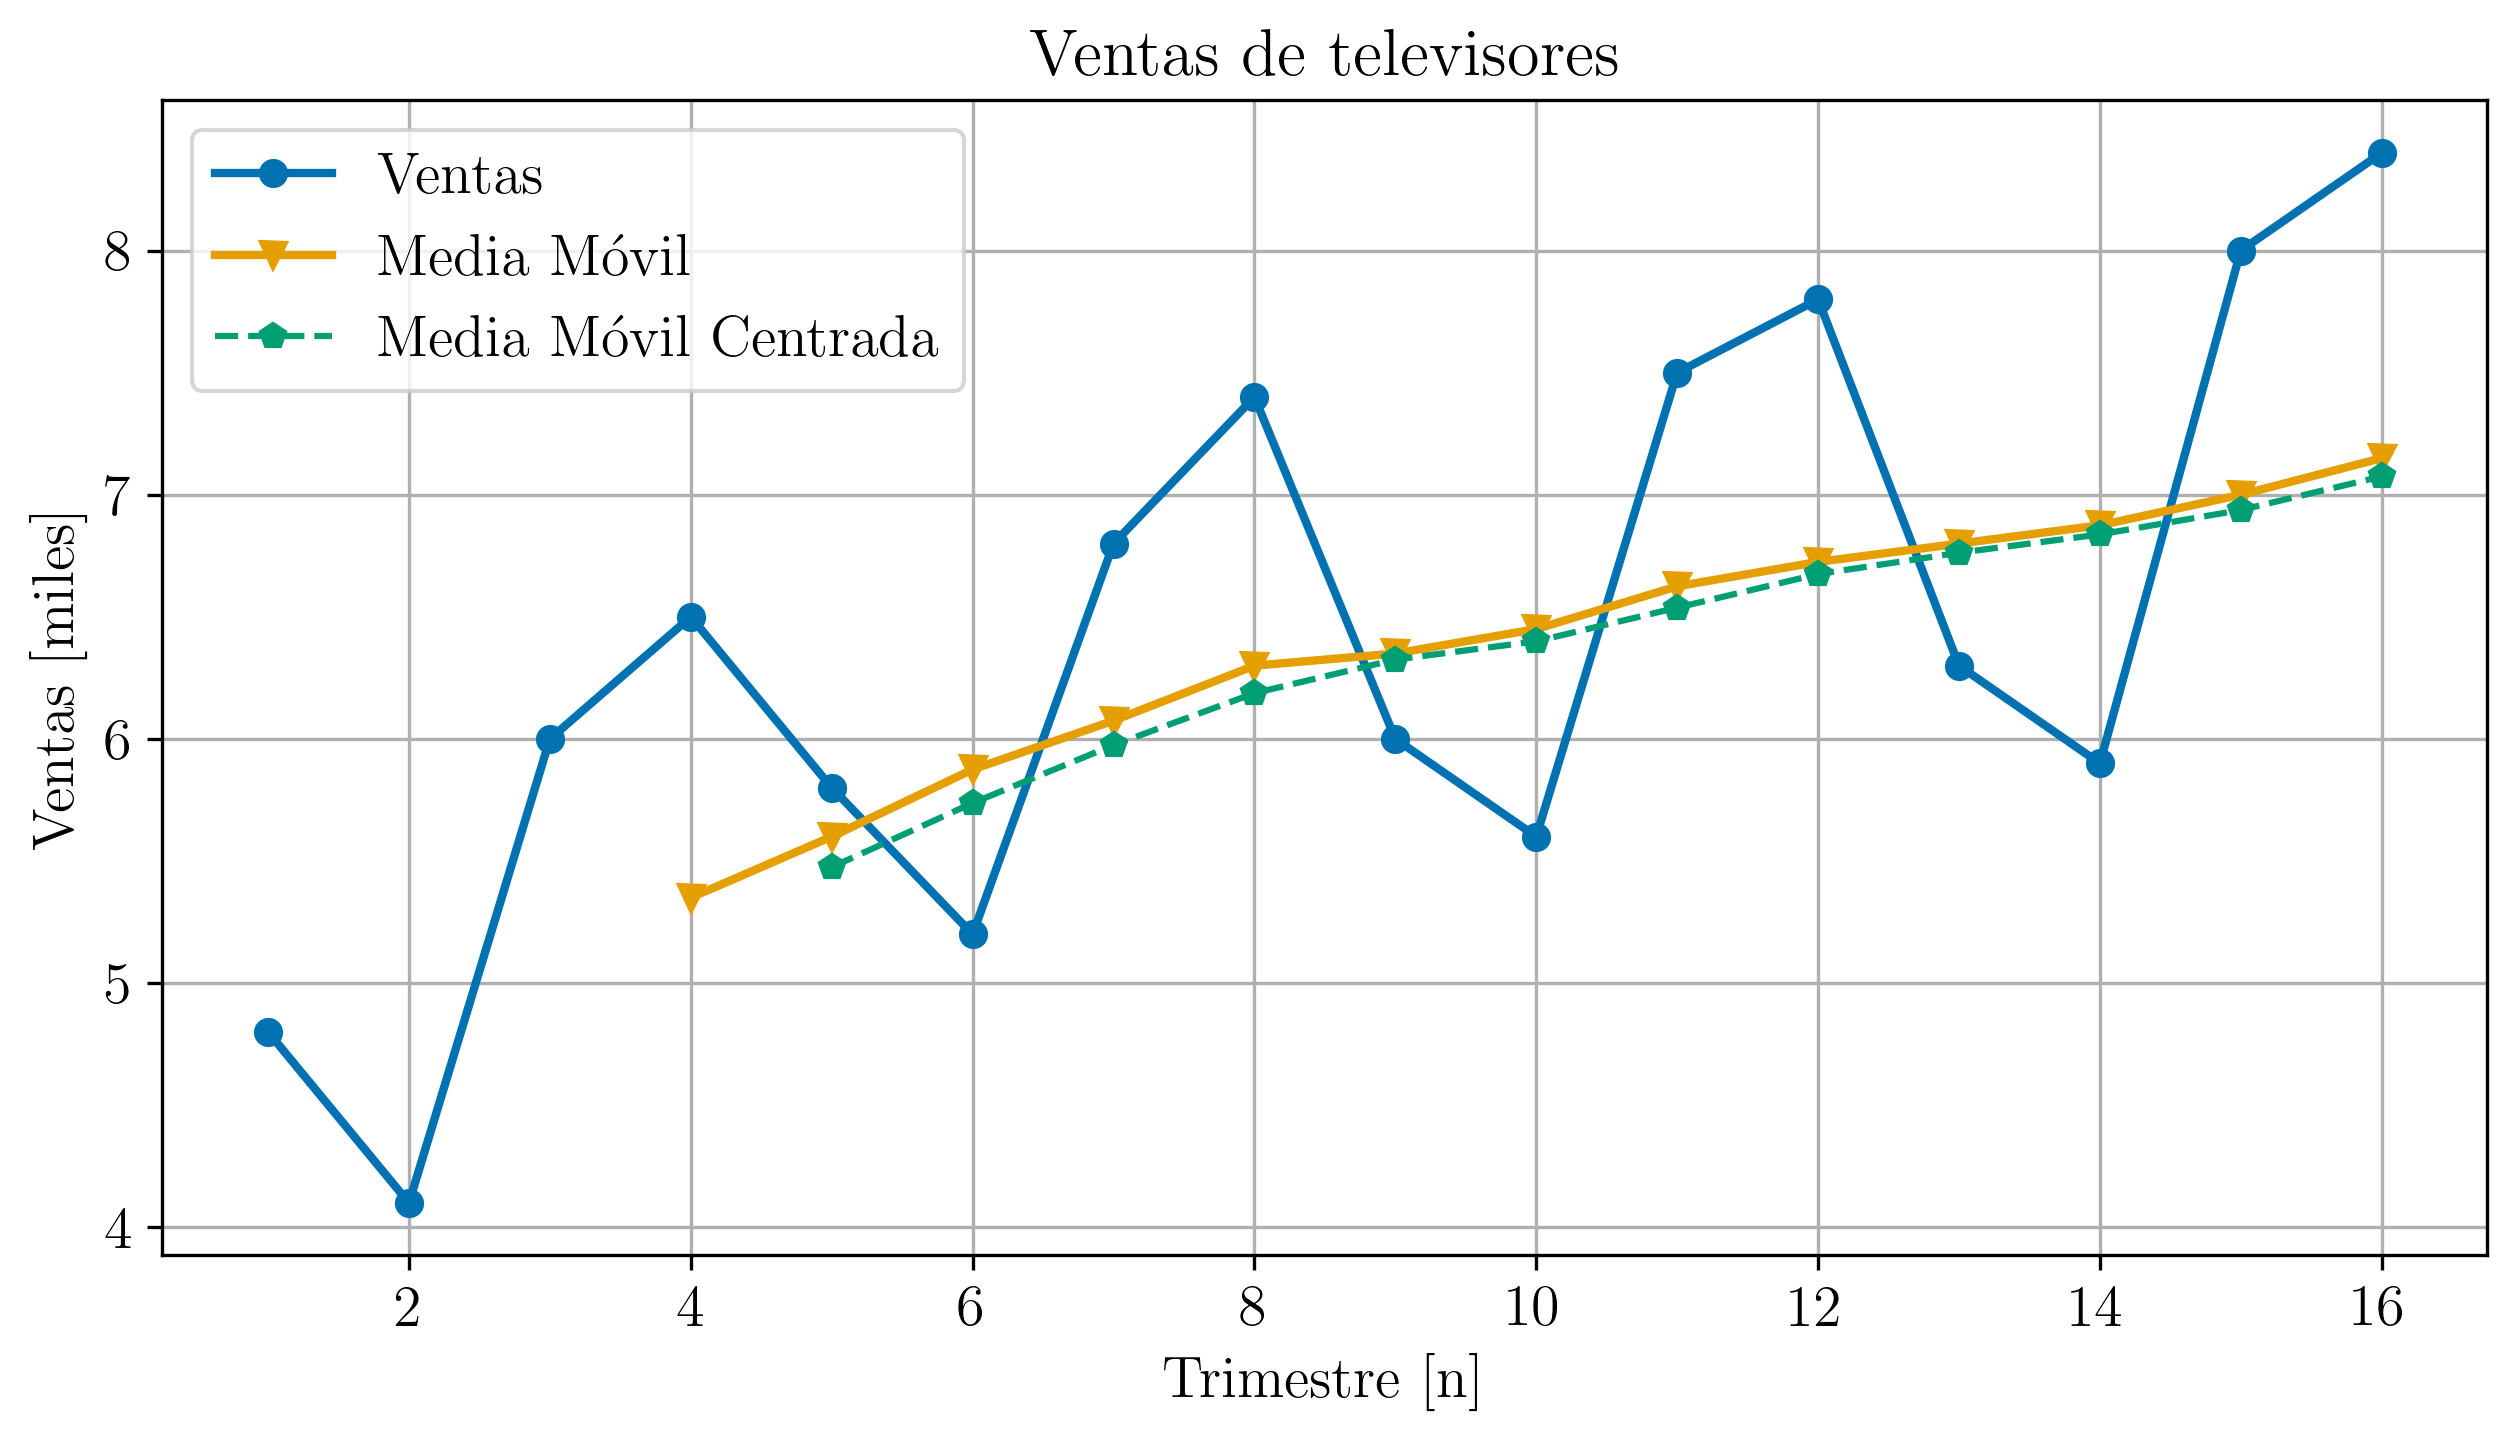

In [9]:
title, xlabel, ylabel = "Ventas de televisores", "Trimestre [n]", "Ventas [miles]"

fig,axes = plt.subplots(1,1, figsize=(10,5))
axes.plot(t, ventas, marker="o", color = "#0072B2", linewidth=2, label="Ventas")
axes.plot(t[t>3], mm, marker="v", color="#E69F00", linewidth=2, label="Media Móvil")
axes.plot(t[t>4], mmC, marker="p", linestyle="--", color="#009E73", linewidth=1.5, label="Media Móvil Centrada")
axes.set_title(title)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
plt.legend()
plt.grid()
plt.show()

## Valores irregulares y desestacionalizados

Valores irregulares

In [10]:
n1 = round((len(ventas) - len(mmC))/2)
n2 = round((len(ventas) + len(mmC))/2)
irreg = np.divide(ventas[n1:n2], mmC)
irregC = centrar_array(ventas, irreg)
print(irreg)

# n = 4
# print(irreg[np.where(t_trim[n1:n2] == n)[0]])
# np.unique(t_trim[n1-1:n2+1], return_counts=True)
# len(t_trim[n1-1:n2+1])
# len(irreg)

[1.09589041 1.1328976  0.9707113  0.84040404 1.07509881 1.15625
 0.91778203 0.83895131 1.1090573  1.14076782 0.90810811 0.83392226]


Índice estacional

In [11]:
ind_estac = []
for i in range(1, 5):
    ind_estac.append(irreg[np.where(t_trim[n1:n2] == i)[0]].mean())

print(ind_estac)

[0.9322004773159601, 0.8377592042498542, 1.0933488421606843, 1.1433051426610321]


Vector de longitud de las ventas con el índice estacional en su respectiva estación

In [12]:
ind_vec = np.array([ind for x in range(4) for ind in ind_estac])
print(ind_vec)

[0.93220048 0.8377592  1.09334884 1.14330514 0.93220048 0.8377592
 1.09334884 1.14330514 0.93220048 0.8377592  1.09334884 1.14330514
 0.93220048 0.8377592  1.09334884 1.14330514]


Ventas Tendencias

In [13]:
desest = np.divide(ventas, ind_vec)
print(desest)

[5.149107   4.8940077  5.48772704 5.68527137 6.22183762 6.20703416
 6.21942397 6.4724628  6.43638375 6.68449833 6.85965879 6.82232565
 6.75820293 7.04259645 7.31696938 7.34711993]


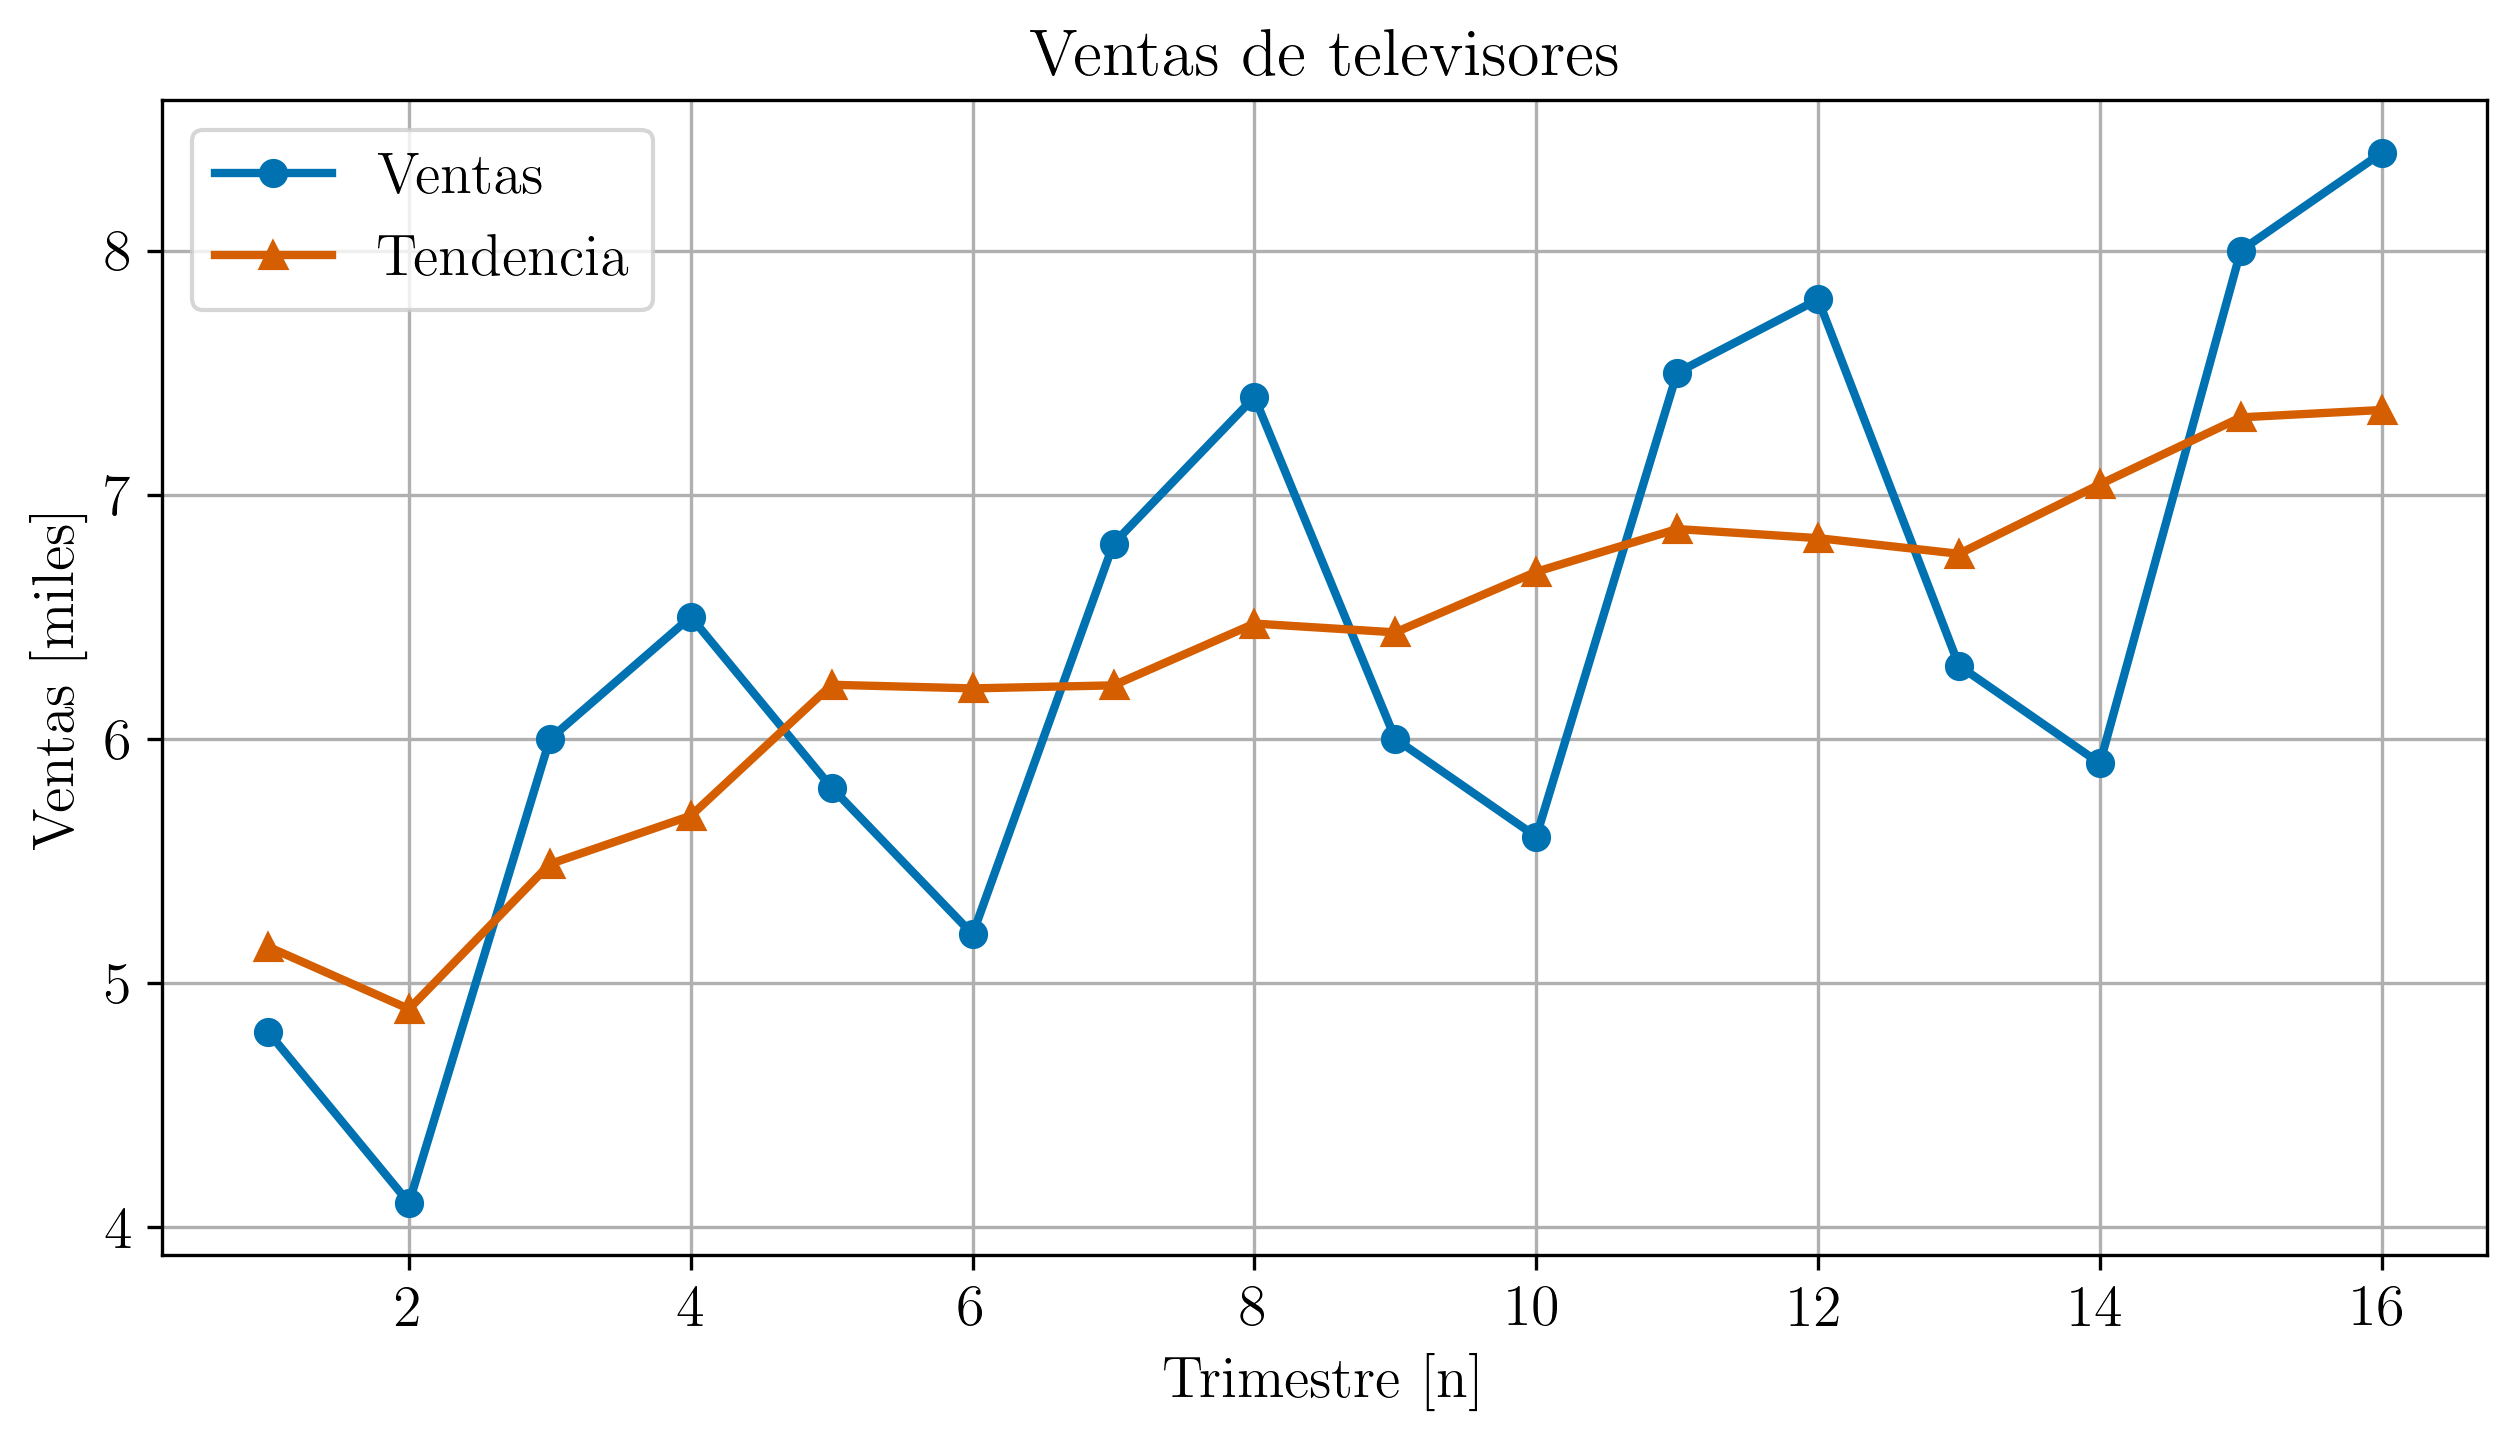

In [14]:
title, xlabel, ylabel = "Ventas de televisores", "Trimestre [n]", "Ventas [miles]"

fig,axes = plt.subplots(1,1, figsize=(10,5))
axes.plot(t, ventas, marker="o", color = "#0072B2", linewidth=2, label="Ventas")
axes.plot(t, desest, marker="^", color="#D55E00", linewidth=2, label="Tendencia")
axes.set_title(title)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
plt.legend()
plt.grid()
plt.show()


# Regresión lineal de la serie Tendencia

In [15]:
from statsmodels.formula.api import ols
from pandas import DataFrame

In [16]:
df = DataFrame({"Trimestre":t, "Ventas":desest})

In [17]:
model = ols("Ventas ~ Trimestre", data=df)
linear_reg = model.fit()
linear_reg.summary()


c:\Users\Cris\pyprojects\Jupyter\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     162.7
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           4.25e-09
Time:                        21:48:29   Log-Likelihood:                 3.1334
No. Observations:                  16   AIC:                            -2.267
Df Residuals:                      14   BIC:                           -0.7215
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0996      0.112     45.726      0.000       4.860       5.339
Trimestre      0.1471      0.012     12.757      0.000       0.122       0.172
==============================================================================
Omnibus:                        2.980   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                1.058
Skew:                          -0.506   Prob(JB):                        0.589
Kurtosis:                       3.751   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
b0, b1 = linear_reg.params
print(b0, b1)

5.099610094908507 0.14713871586017646


In [19]:
y = linear_reg.predict()
e = linear_reg.resid

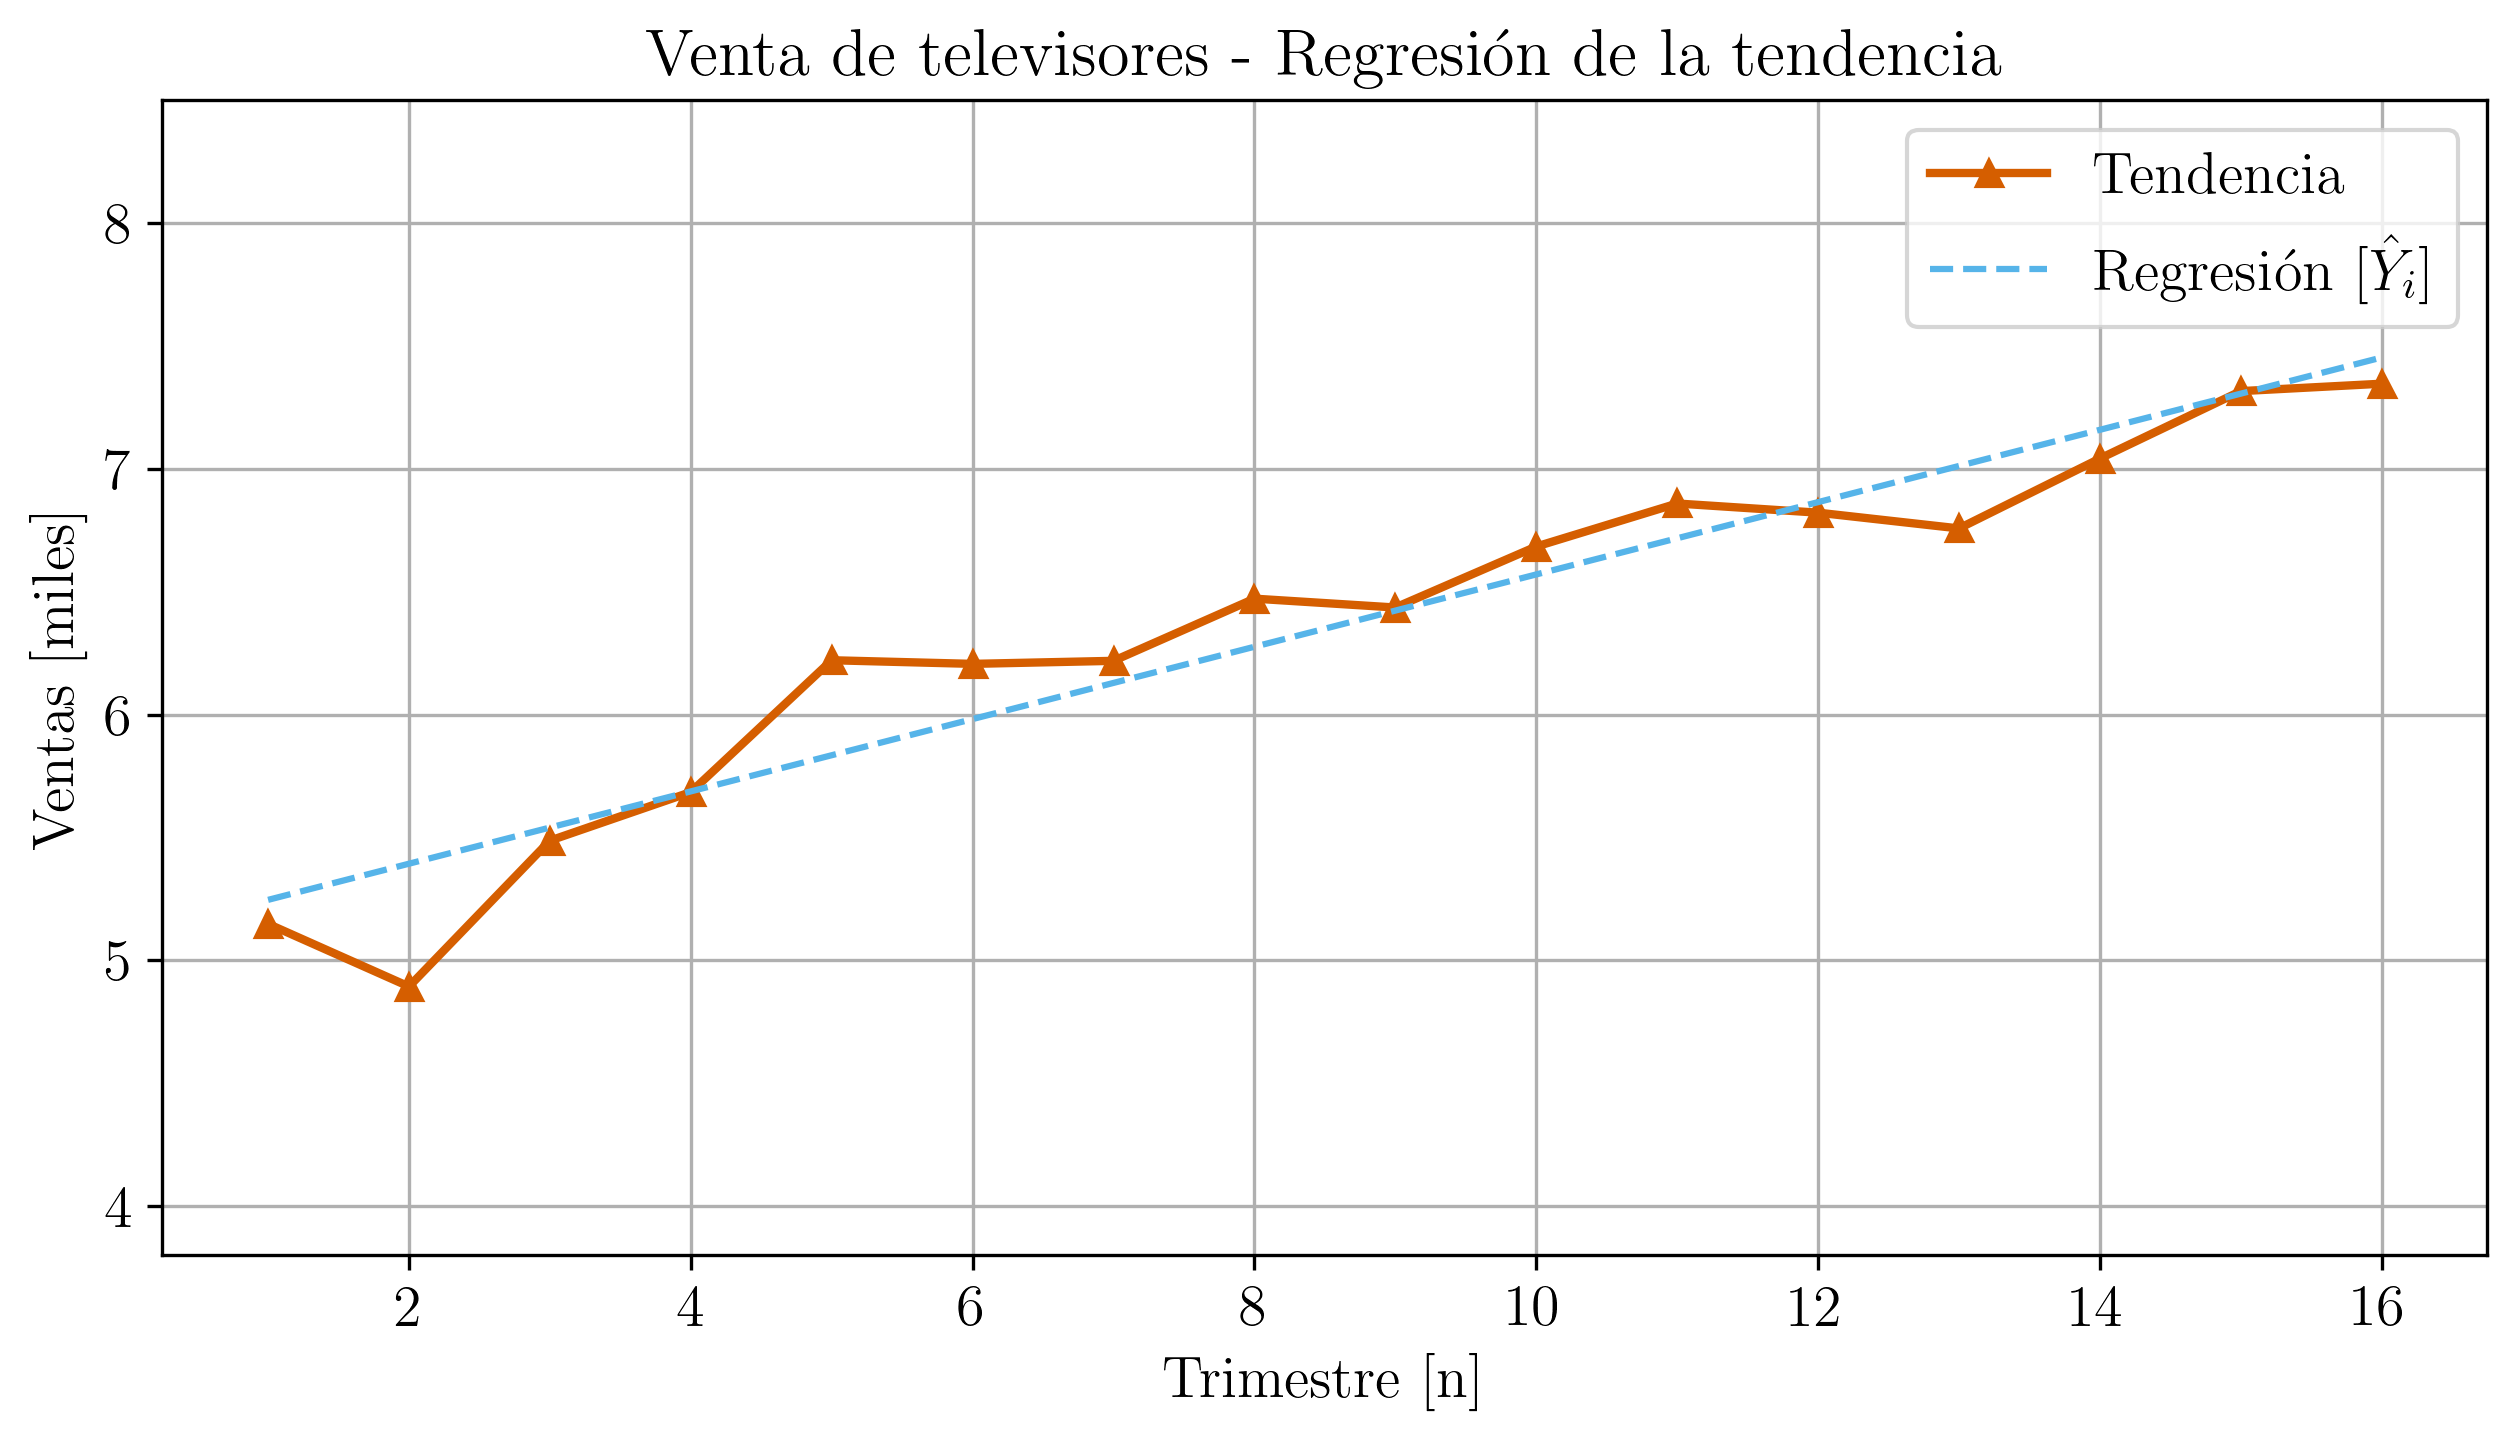

In [20]:
fig,axes = plt.subplots(1,1, figsize=(10,5))
axes.plot(t, desest, marker="^", color = "#D55E00", linewidth=2, label="Tendencia")
axes.plot(t, y, linestyle="--", label=r"Regresión [$\hat{Y}_i$]", color="#56B4E9")
axes.set_title("Venta de televisores - Regresión de la tendencia")
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
axes.set_ylim([3.8, 8.5])
plt.legend()
plt.grid()
plt.show()

# Verificación del modelo de regresión

## Coeficiente de determinación $R^2$

Se comienza la verificación del modelo revisando el coeficiente de determinación. Al imprimirlo,

In [21]:
print("R^2 - ", linear_reg.rsquared)
print("R^2 Ajustado - ", linear_reg.rsquared_adj)

R^2 -  0.9207911196355988
R^2 Ajustado -  0.915133342466713


parece ser que éste es elevado y por lo tanto es probable que, en efecto, el modelo (tendencia) sea significativo.

## Significancia de $\beta_1$

Se prosigue con la verificación de la significancia del coeficiente que otorga la tendencia lineal,

In [22]:
import scipy.stats as stats

In [23]:
n = len(df)                             # Tamaño de muestra
k = 1                                   # Numero de variables independientes del modelo

sb1 = e.std()/(np.sqrt(n-2)*t.std())    # Estimador de Beta 1
ts = (b1)/(sb1)                         # Estadístico de prueba, t

p_value = 2*(1 - stats.t.cdf(x = abs(ts), df = n-k-1))

print("t de pureba: " + str(ts))
print("p-value: " + str(p_value))


t de pureba: 12.352170562178411
p-value: 6.446696065864899e-09


y, tras calcular el estimador del coeficiente y su respectivo estadístico de prueba $t^*$, se observa que tiene el mismo valor que el arrojado por la verificación del modelo de Statsmodels, y el p-value asociado es cercano a cero. Por lo tanto, es posible descartar la hipótesis nula de que el coeficiente $\beta_1 = 0$.

## Análisis de residuos

### Normalidad

Se realiza una prueba de normalidad de Shapiro-Wilk sobre los residuos

In [24]:
s, p = stats.shapiro(e)
print("Estadístico W:", s)
print("p-value", p)


Estadístico W: 0.9637872576713562
p-value 0.730697751045227


Se obtiene un valor bastante mayor a un $\alpha = 0.05$, por lo cual no se rechaza la hipótesis nula de que los residuos siguen una distribución normal. Se visualiza lo anterior con un QQ-plot:

In [25]:
import seaborn as sns

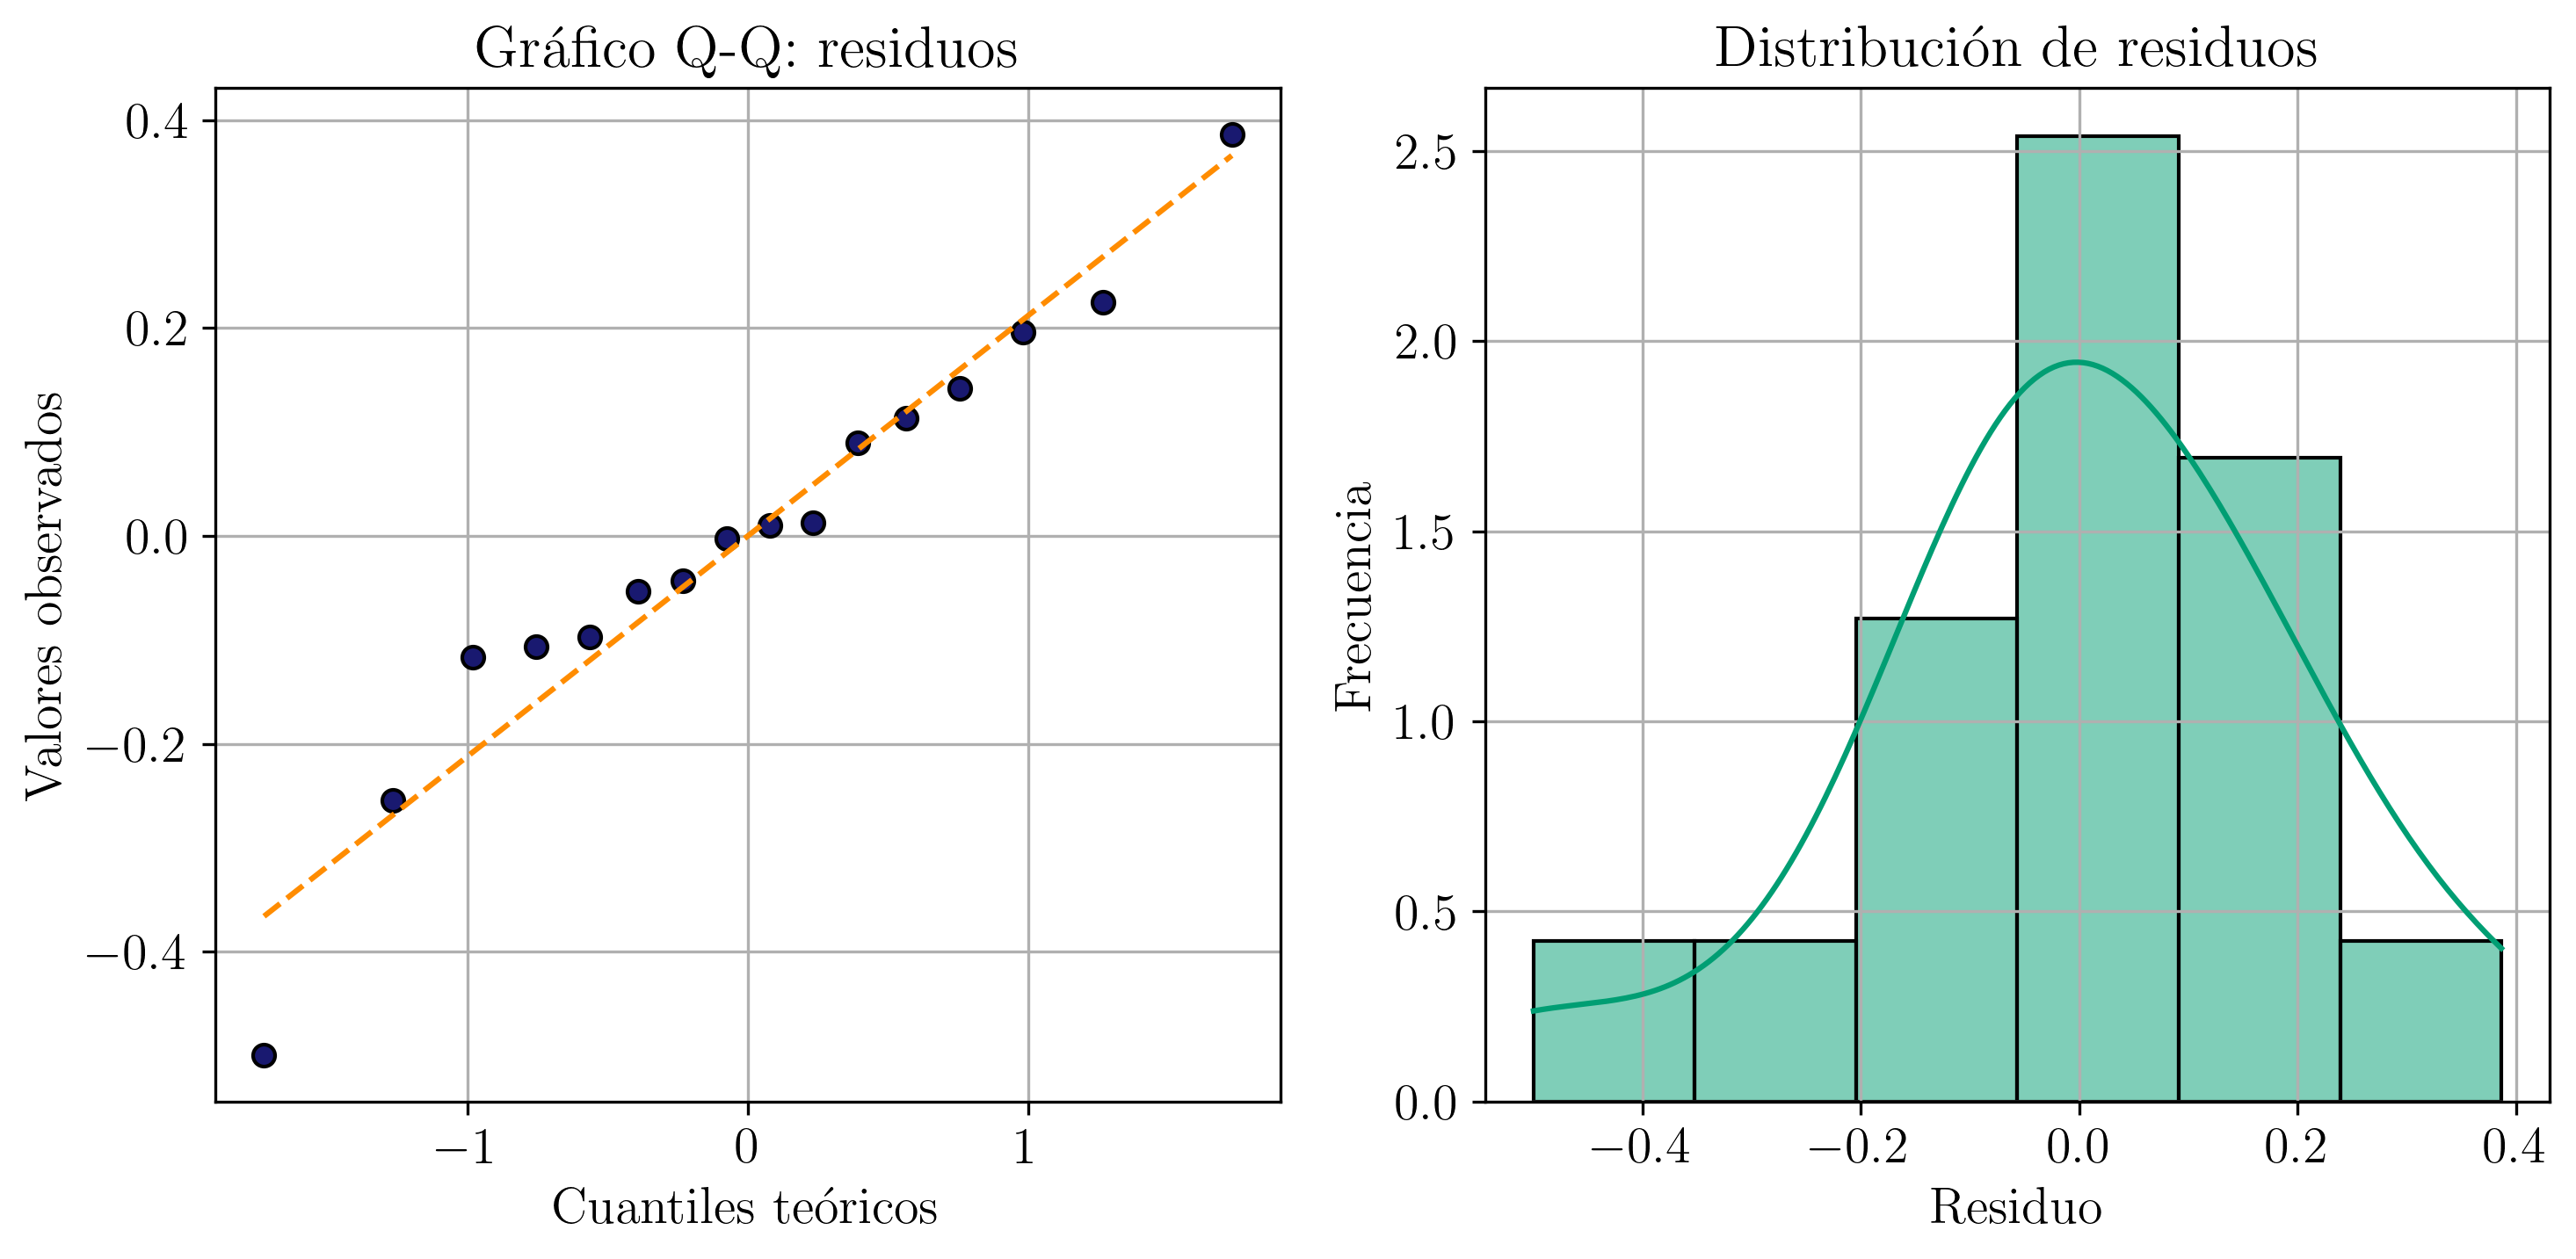

In [26]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

stats.probplot(e, plot = axes[0])
axes[0].get_lines()[0].set_marker('o')
axes[0].get_lines()[0].set_color('midnightblue')
axes[0].get_lines()[0].set_markeredgecolor('k')
axes[0].get_lines()[1].set_color('darkorange')
axes[0].get_lines()[1].set_linestyle('--')
axes[0].set_title("Gráfico Q-Q: residuos")
axes[0].set_xlabel("Cuantiles teóricos")
axes[0].set_ylabel("Valores observados")
axes[0].grid()

sns.histplot(x = e, kde = True, stat = "density", color = "#009E73", ax = axes[1])
axes[1].set_title("Distribución de residuos")
axes[1].set_xlabel("Residuo")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.grid()
plt.show()

### Homocedasticidad

Se grafica la varianza de los residuos para ver si siguen alguna tendencia importante

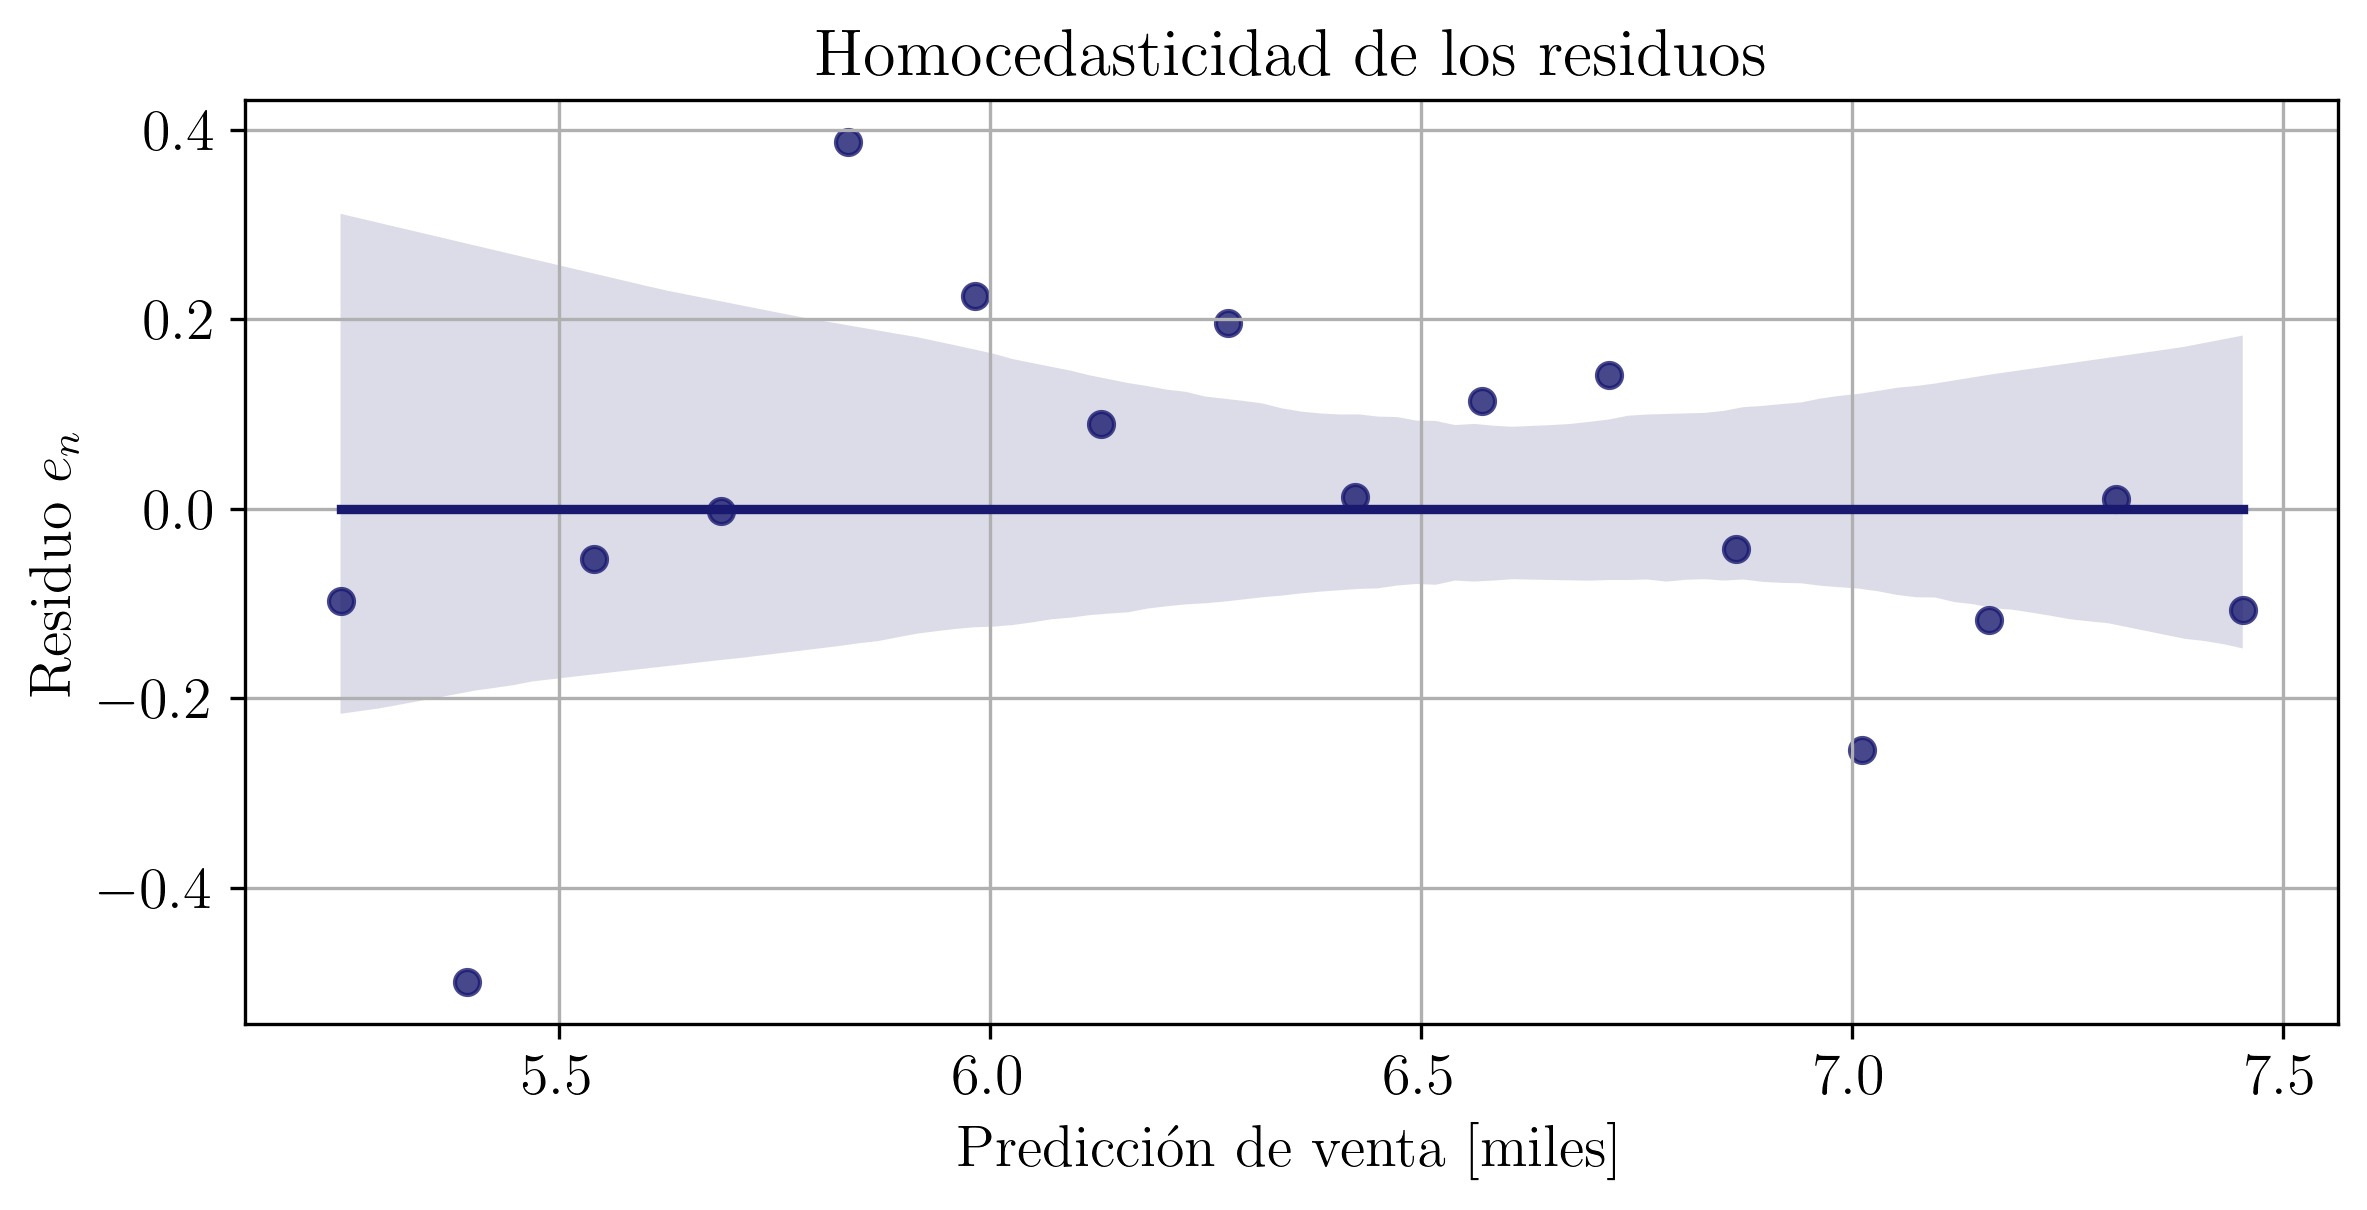

In [27]:
fig,axes = plt.subplots(1,1, figsize=(9,4))
sns.regplot(x = y, y = e, color = "midnightblue", ax = axes)
axes.set_title("Homocedasticidad de los residuos")
axes.set_xlabel("Predicción de venta [miles]")
axes.set_ylabel(r"Residuo $e_n$")
plt.grid()
plt.show()

A pesar de que hay pocos datos, parece ser que la regresión de Seaborn indica una nula tendencia, no obstante, debe realizarse una prueba de hipótesis de independencia; es decir, que la media de los residuos no sea diferente de cero:

In [28]:
e_tstat, e_ind_pvalue = stats.ttest_1samp(e, popmean=0)
print("Estadístico de prueba t:", e_tstat)
print("Media de los residuos", e.mean())
print("p-value:", e_ind_pvalue)

Estadístico de prueba t: -3.6744469017973615e-14
Media de los residuos -1.887379141862766e-15
p-value: 0.9999999999999711


ya que se obtuvo un p-value muy cercano a 1, no se puede rechazar la hipótesis nula que establece que la media de los residuos es igual a cero; por lo tanto, se comprueba la condición de homocedasticidad.

# Errores en la predicción de la serie de tiempo

In [29]:
# MSE - Mean Squared Error
# MAPE - Mean absolute percentage error
predicciones = np.multiply(y, ind_vec)

MSE = ((ventas - predicciones)**2).sum()/n
MAPE = np.abs(np.divide(ventas - predicciones, ventas)).sum()/n

print("Cuadrado medio del error:", round(MSE, 4))
print("Promedio de los errores porcentuales:",round(MAPE, 4))

Cuadrado medio del error: 0.033
Promedio de los errores porcentuales: 0.0244


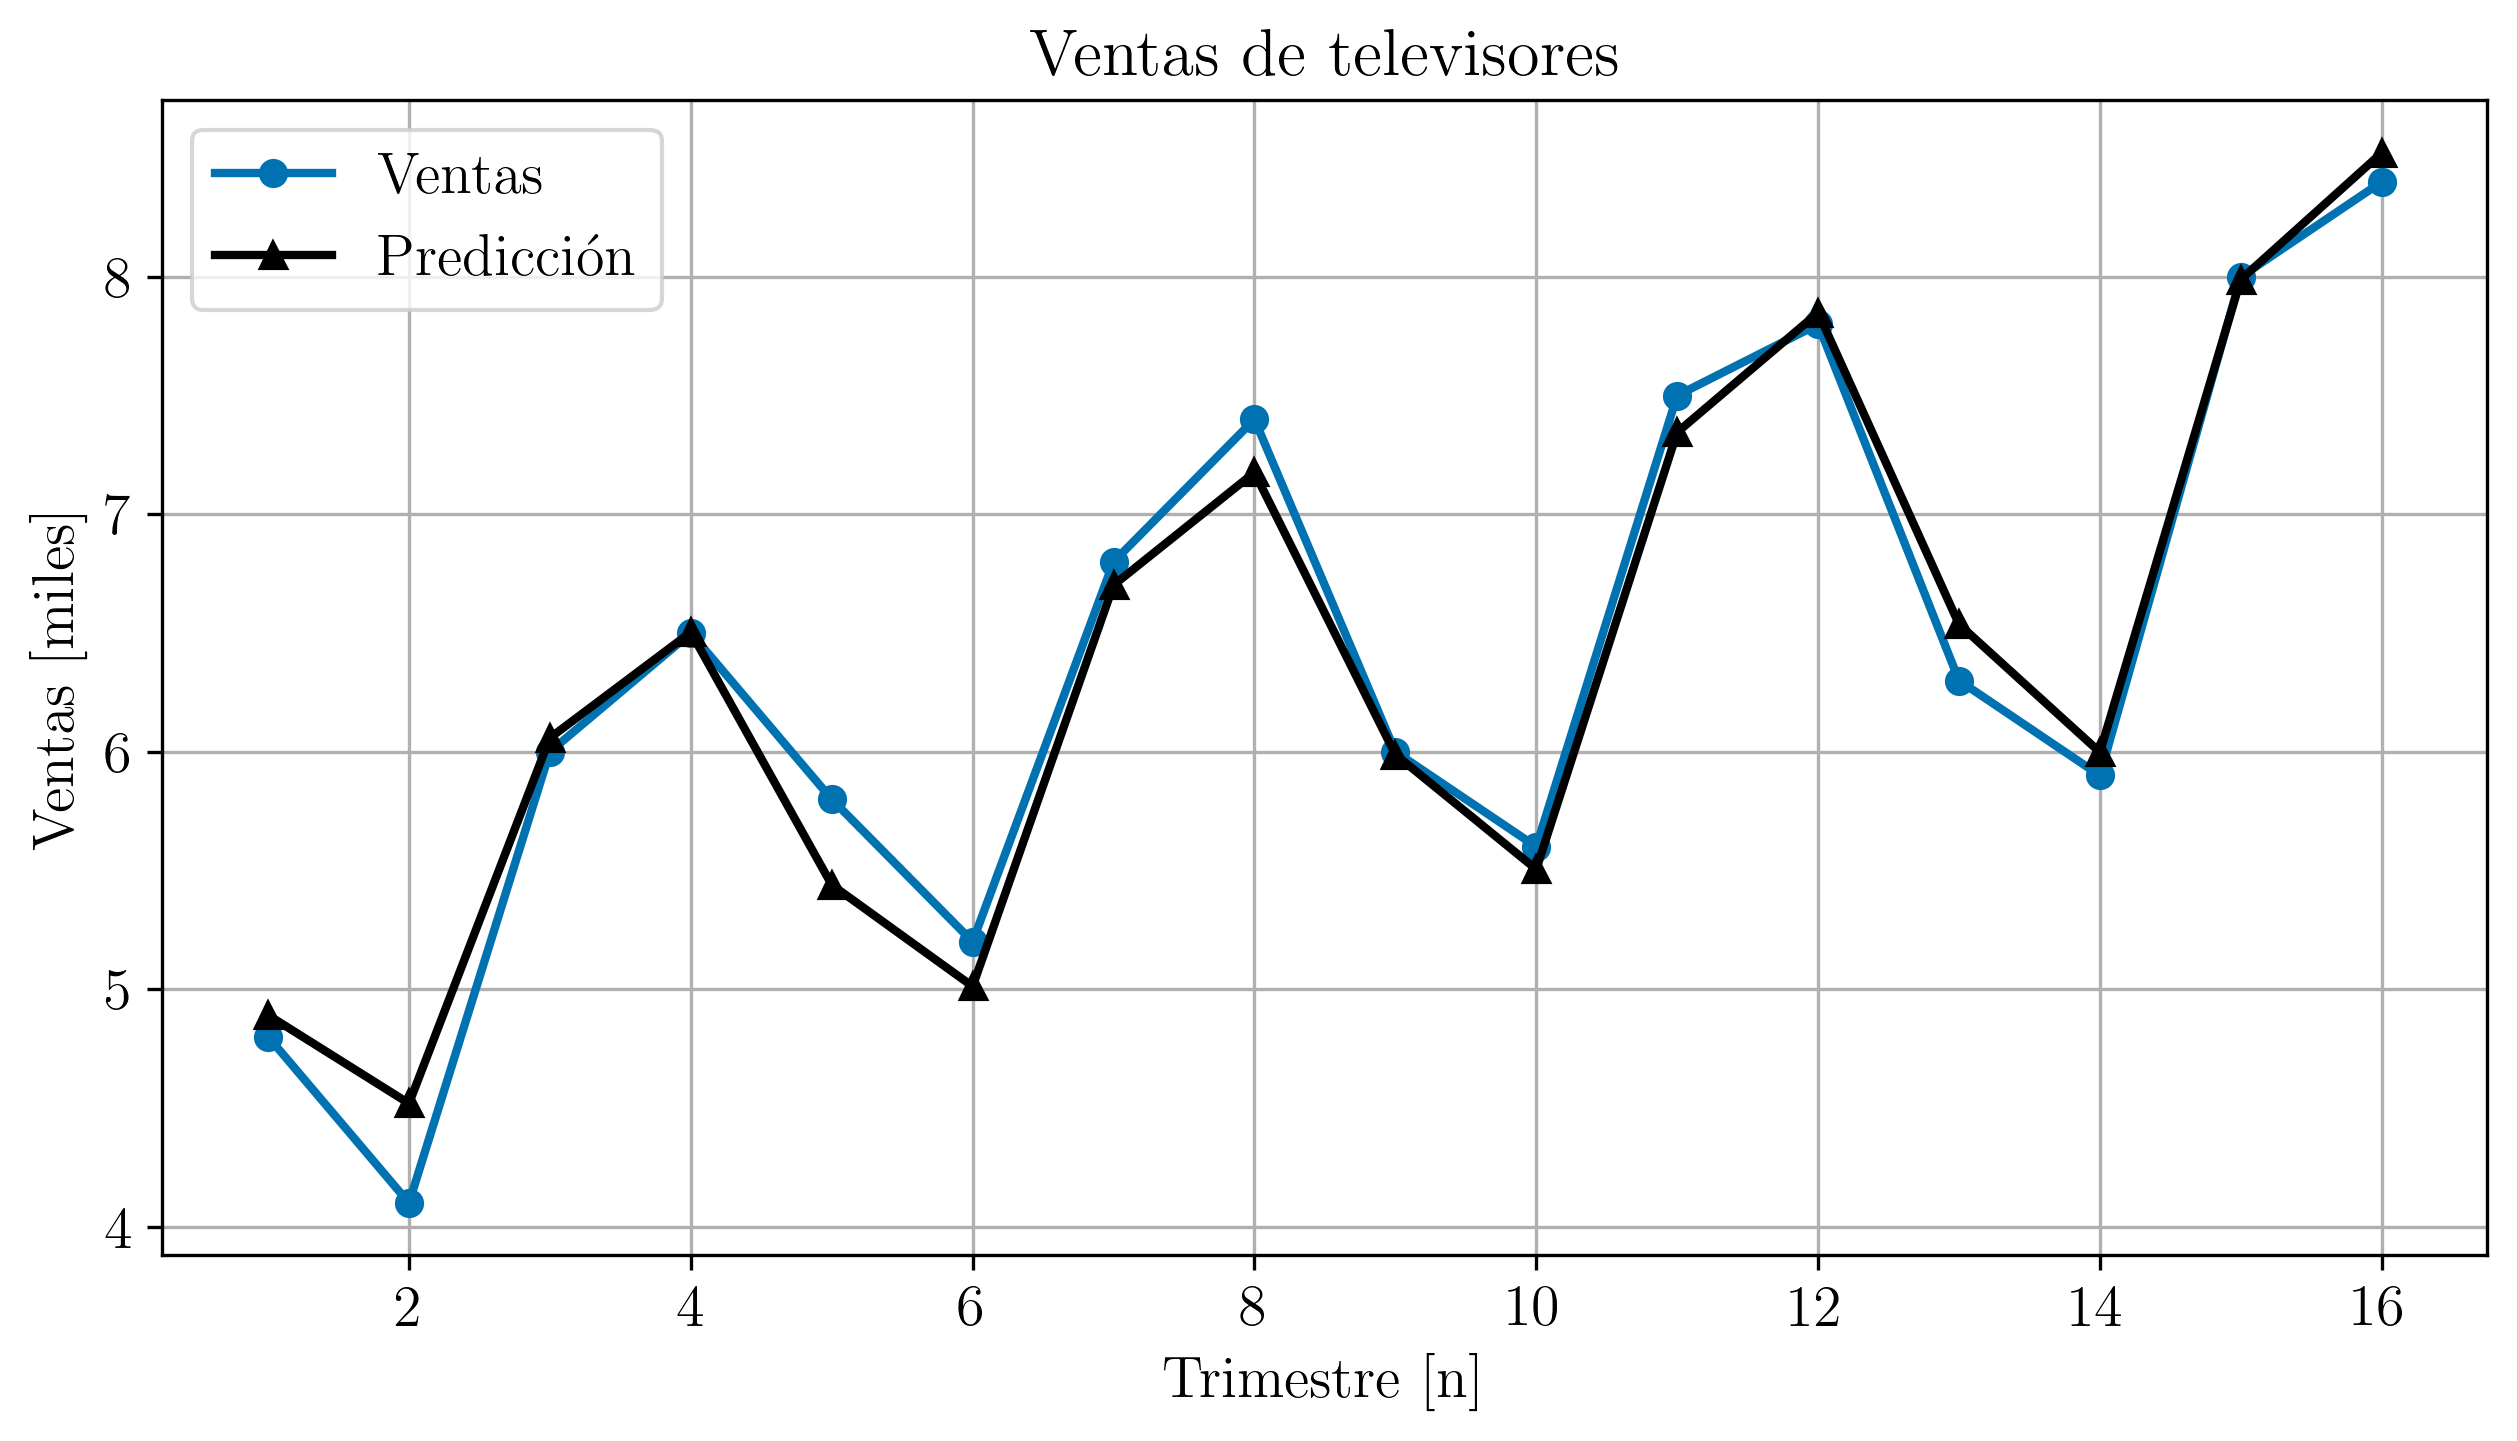

In [30]:
title, xlabel, ylabel = "Ventas de televisores", "Trimestre [n]", "Ventas [miles]"

fig,axes = plt.subplots(1,1, figsize=(10,5))
axes.plot(t, ventas, marker="o", color = "#0072B2", linewidth=2, label="Ventas")
axes.plot(t, predicciones, marker="^", color="k", linewidth=2, label="Predicción")
axes.set_title(title)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
plt.legend()
plt.grid()
plt.show()

# Pronóstico del año siguiente

In [31]:
t_pred = np.array([17,18,19,20])

tendencia = b0 + b1*t_pred
pred = np.multiply(tendencia, np.array(ind_estac))

print("Predicciones Año 5:", pred.round(4))

Predicciones Año 5: [7.0856 6.491  8.6323 9.1949]


In [32]:
t_pred_viz = [x for x in range(16, 21)]
pred_viz = [ventas[-1]]
pred_viz.extend([x for x in pred])
print(t_pred_viz)
print(pred_viz)

[16, 17, 18, 19, 20]
[8.4, 7.0856262442597355, 6.491047938335677, 8.632257740571097, 9.194899457624611]


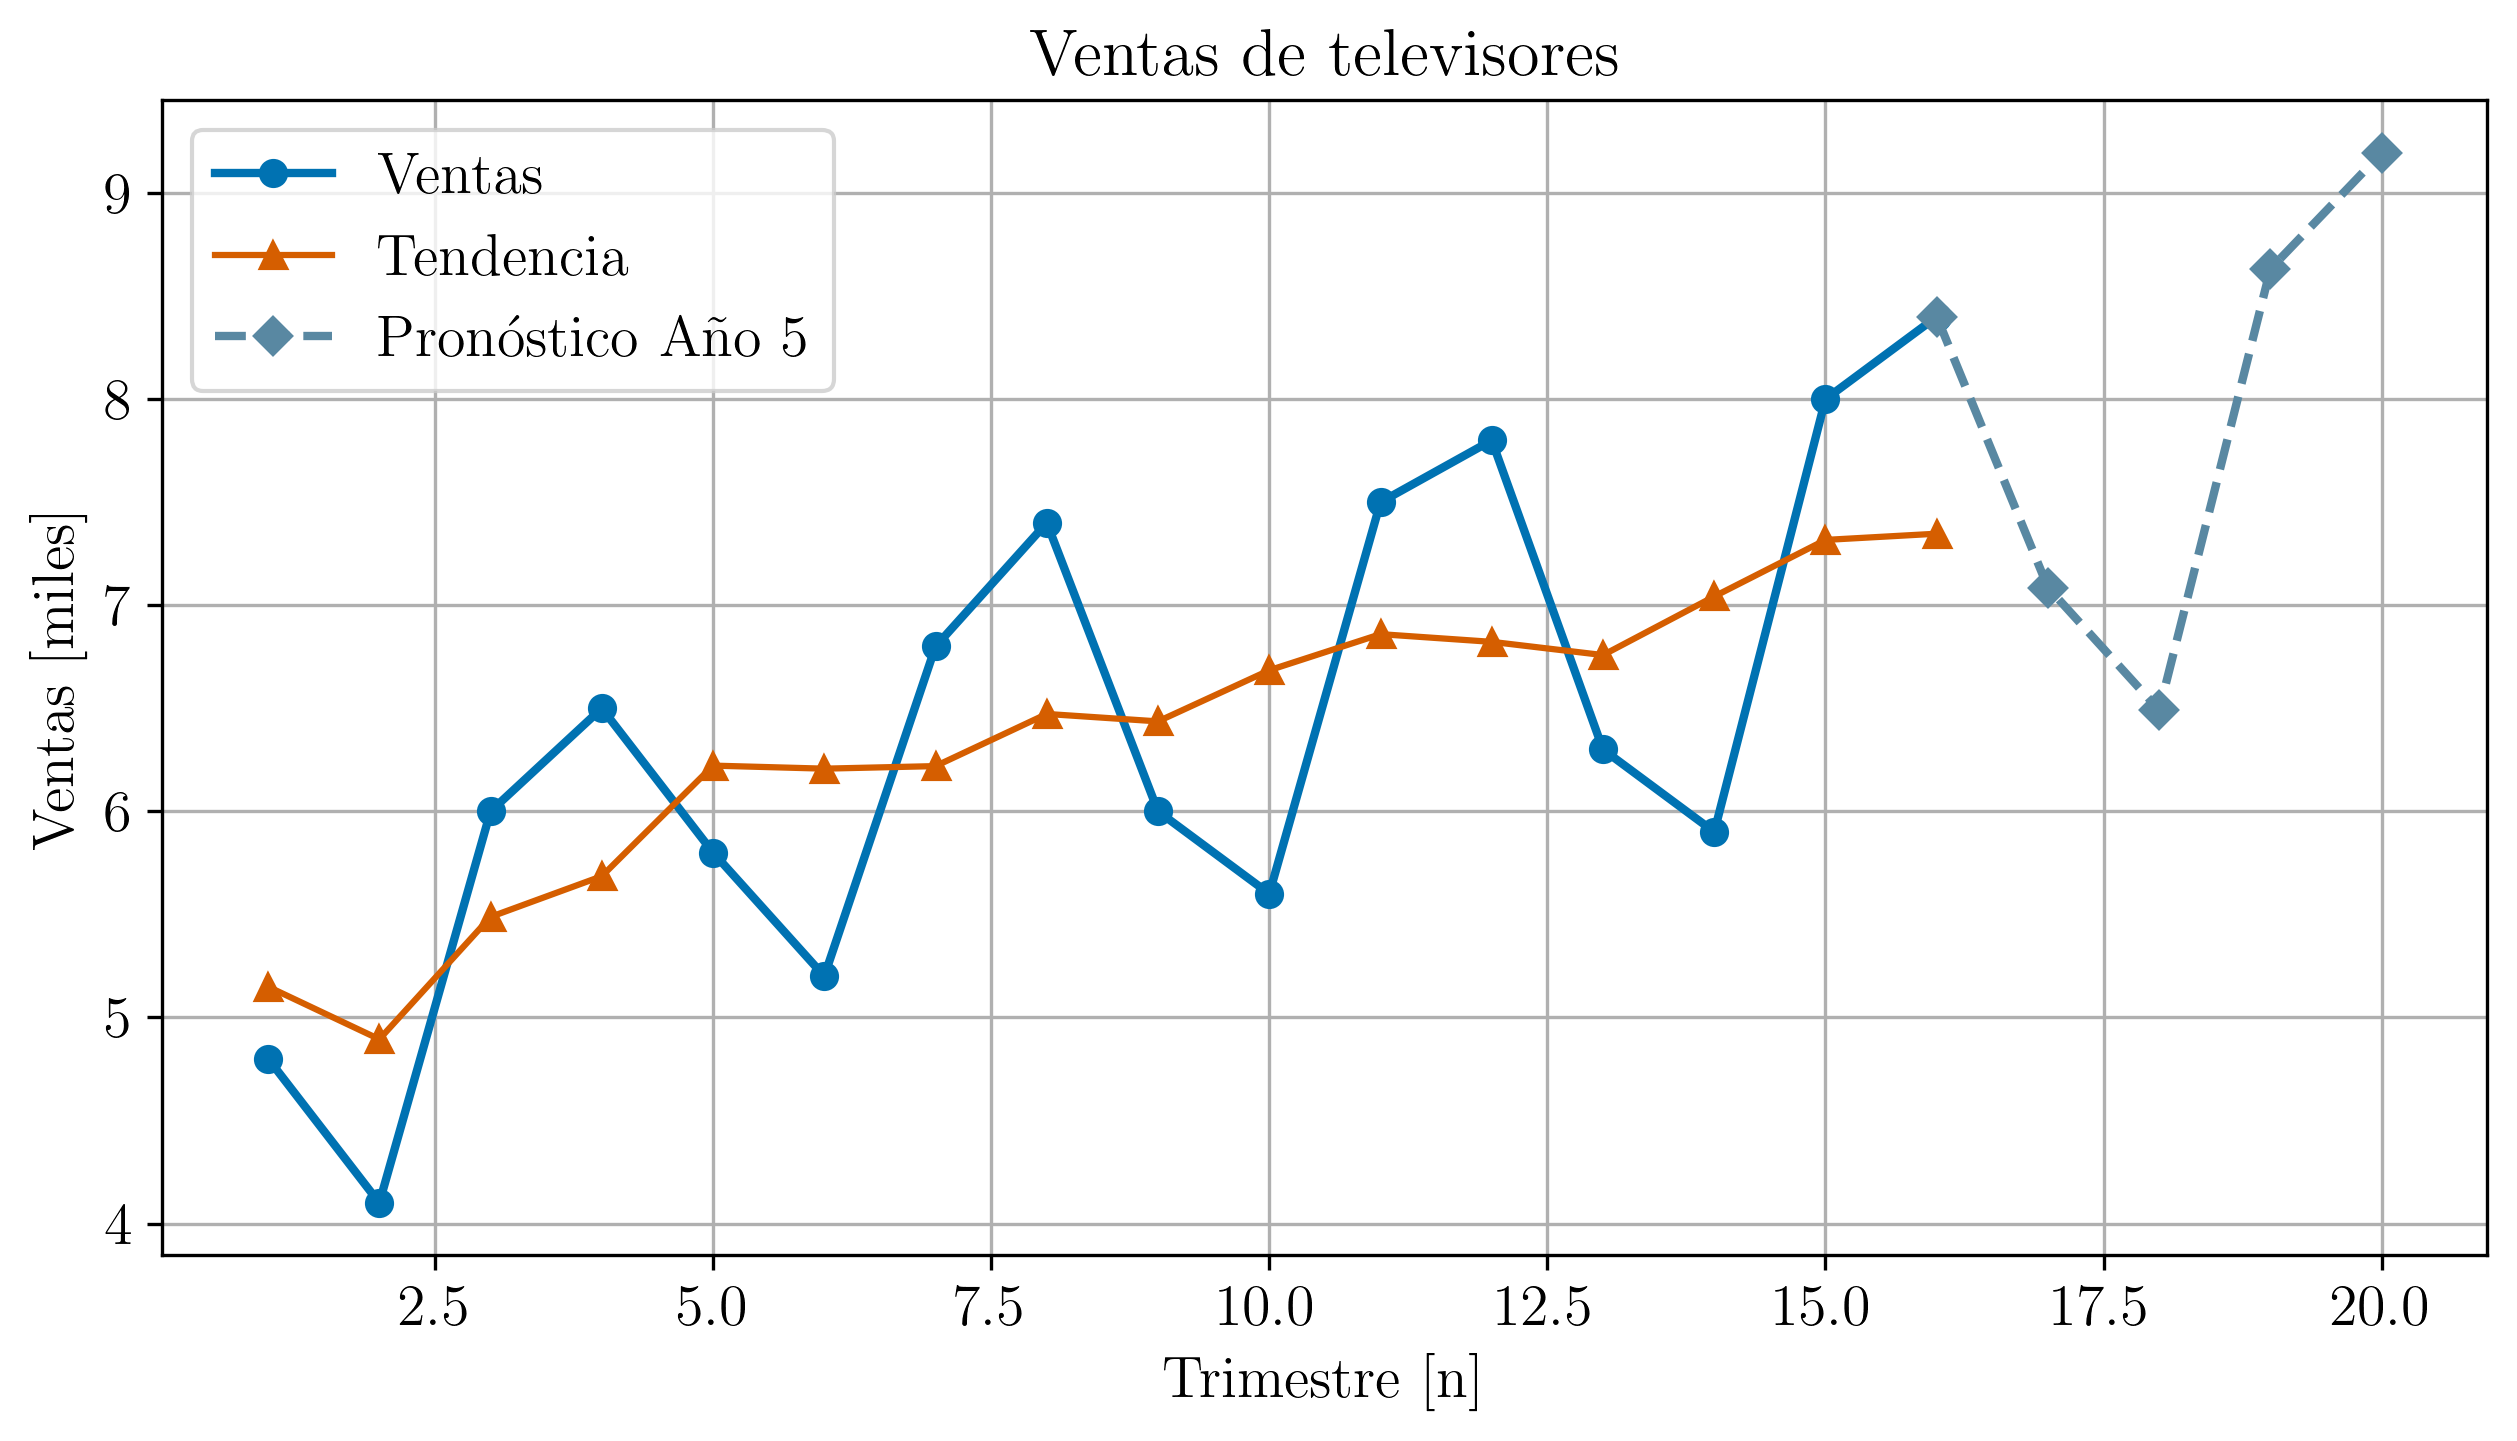

In [33]:
title, xlabel, ylabel = "Ventas de televisores", "Trimestre [n]", "Ventas [miles]"

fig,axes = plt.subplots(1,1, figsize=(10,5))

axes.plot(t, ventas, marker="o", color = "#0072B2", linewidth=2, label="Ventas")
axes.plot(t, desest, marker="^", color="#D55E00", linewidth=1.5, label="Tendencia")
axes.plot(t_pred_viz, pred_viz, marker="D", color="#5988A2", linestyle="--", linewidth=2, label="Pronóstico Año 5")
axes.set_title(title)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
plt.legend()
plt.grid()
plt.show()